**Learning Embedded Stochastic Approximation**

Instance: BAA99

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import copy 
import random
import time
# import the Model class from docplex.mp
from docplex.mp.model import Model

In [2]:
import utils
import sa_baa99

**Function Value Approximation**

In [3]:
# load baa99 file 
baa99_data = pd.read_csv('/Users/sonny/Documents/Courses/CSCI566/experiment/training_set/baa99_sample4.csv')
# split the data file 
baa99_train, baa99_val = train_test_split(baa99_data, test_size=0.2)


In [4]:
# pad zeros 
# 5 channels for x and 5 channels for omega 
n_x = 5
n_omega = 5

# baa99
baa99_train.to_numpy()
baa99_val.to_numpy()

baa99_train_pad_zero = np.zeros((baa99_train.shape[0],n_x+n_omega+1))
baa99_val_pad_zero = np.zeros((baa99_val.shape[0],n_x+n_omega+1))

baa99_train_pad_zero[:,:2] = baa99_train.to_numpy()[:,:2]
baa99_train_pad_zero[:,n_x:(n_x+2)] = baa99_train.to_numpy()[:,2:4]
baa99_train_pad_zero[:,-1] = baa99_train.to_numpy()[:,-1]

baa99_val_pad_zero[:,:2] = baa99_val.to_numpy()[:,:2]
baa99_val_pad_zero[:,n_x:(n_x+2)] = baa99_val.to_numpy()[:,2:4]
baa99_val_pad_zero[:,-1] = baa99_val.to_numpy()[:,-1]

In [5]:
# set up data loader 
batch_size = 40
nworkers = 4
baa99_train_data_loader = torch.utils.data.DataLoader(baa99_train_pad_zero, batch_size=batch_size, shuffle=True, num_workers=nworkers)
baa99_val_data_loader = torch.utils.data.DataLoader(baa99_val_pad_zero, batch_size=batch_size, shuffle=True, num_workers=nworkers)

In [4]:
import torch.nn as nn

# Neural Network Architecture 1 
# Linear, output units: 40
# ReLU 
# Linear, output units: 1

class nn_m1(nn.Module):
    def __init__(self, nz):
        super(nn_m1, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(nz, 40, bias=True),
            nn.ReLU(),
            nn.Linear(40, 1, bias=True))
    
    def forward(self, x):
        return self.net(x)

# Neural Network Architecture 2
# Linear, output units: 40
# ReLU 
# Linear, output units: 80
# ReLU 
# Linear, output units: 40
# ReLU
# Linear, output units: 1
class nn_m2(nn.Module):
    def __init__(self, nz):
        super(nn_m2, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(nz, 40, bias=True),
            nn.ReLU(),
            nn.Linear(40, 80, bias=True),
            nn.ReLU(),
            nn.Linear(80, 40, bias=True),
            nn.ReLU(),
            nn.Linear(40, 1, bias=True))
    
    def forward(self, x):
        return self.net(x)
    

# Neural Network Architecture 3
# Linear, output units: 128
# LeakyReLU 
# Linear, output units: 256
# LeakyReLU 
# Linear, output units: 128
# LeakyReLU
# Linear, output units: 1
class nn_m3(nn.Module):
    def __init__(self, nz):
        super(nn_m3, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(nz, 128, bias=True),
            nn.LeakyReLU(),
            nn.Linear(128, 256, bias=True),
            nn.LeakyReLU(),
            nn.Linear(256, 128, bias=True),
            nn.LeakyReLU(),
            nn.Linear(128, 1, bias=True))
    
    def forward(self, x):
        return self.net(x)

In [7]:
# build model 
nz = n_x + n_omega
baa99_model = nn_m3(nz)

# inirialize model hyperparameters 
model_parameter = {}
model_parameter['epoch'] = 30
model_parameter['learning_rate'] = 1e-4
model_parameter['output_model'] = '/Users/sonny/Documents/Courses/CSCI566/experiment2/baa99_model.pt'

Run Epoch 0
It 0, L2 training loss: 1198672.25 
It 0, L2 validation loss: 1258192.875 
It 50, L2 training loss: 955728.0 
It 50, L2 validation loss: 1222330.0 
It 100, L2 training loss: 1095134.375 
It 100, L2 validation loss: 1103658.25 
It 150, L2 training loss: 559802.0 
It 150, L2 validation loss: 798505.9375 
Run Epoch 1
It 200, L2 training loss: 271452.125 
It 200, L2 validation loss: 400494.5 
It 250, L2 training loss: 66736.7734375 
It 250, L2 validation loss: 138906.0 
It 300, L2 training loss: 44409.10546875 
It 300, L2 validation loss: 52846.86328125 
It 350, L2 training loss: 39846.41796875 
It 350, L2 validation loss: 29136.17578125 
Run Epoch 2
It 400, L2 training loss: 5447.169921875 
It 400, L2 validation loss: 19480.1875 
It 450, L2 training loss: 22561.333984375 
It 450, L2 validation loss: 15222.646484375 
It 500, L2 training loss: 8397.498046875 
It 500, L2 validation loss: 12309.3291015625 
It 550, L2 training loss: 17698.22265625 
It 550, L2 validation loss: 10548

It 4350, L2 training loss: 97.45848083496094 
It 4350, L2 validation loss: 82.25515747070312 
Run Epoch 22
It 4400, L2 training loss: 51.12670135498047 
It 4400, L2 validation loss: 79.19031524658203 
It 4450, L2 training loss: 102.15225219726562 
It 4450, L2 validation loss: 83.00965881347656 
It 4500, L2 training loss: 83.07544708251953 
It 4500, L2 validation loss: 86.64251708984375 
It 4550, L2 training loss: 57.80876541137695 
It 4550, L2 validation loss: 78.11927032470703 
Run Epoch 23
It 4600, L2 training loss: 66.61439514160156 
It 4600, L2 validation loss: 73.95745849609375 
It 4650, L2 training loss: 68.6662368774414 
It 4650, L2 validation loss: 86.98414611816406 
It 4700, L2 training loss: 177.05030822753906 
It 4700, L2 validation loss: 92.21135711669922 
It 4750, L2 training loss: 69.68278503417969 
It 4750, L2 validation loss: 69.61544036865234 
Run Epoch 24
It 4800, L2 training loss: 88.43449401855469 
It 4800, L2 validation loss: 68.61689758300781 
It 4850, L2 training

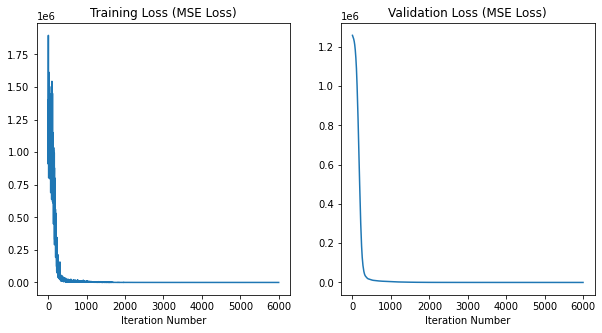

Model has been saved.


In [8]:
# train the model 
utils.normal_train(model_parameter, baa99_model, baa99_train_data_loader, baa99_val_pad_zero)

Load the model

In [5]:
# load model 
# 5 channels for x and 5 channels for omega 
n_x = 5
n_omega = 5

nz = n_x + n_omega
model_path_baa99 = '/Users/sonny/Documents/Courses/CSCI566/experiment2/baa99_model.pt' 
nn_baa99_model_load = nn_m3(nz)
nn_baa99_model_load.load_state_dict(torch.load(model_path_baa99))
nn_baa99_model_load.eval()

nn_m3(
  (net): Sequential(
    (0): Linear(in_features=10, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [7]:
# test on benchmark_sample2tensor_landS
benchmark_sample_set = sa_baa99.benchmark_sample2tensor_baa99(1000)

**random seed = 123**

In [8]:
# test on vanilla LESA
x = np.zeros(2)
x_proj = sa_baa99.projection_baa99(x)
print('x_proj')
print(x_proj)
x_est_lesa, x_record_lesa = sa_baa99.lesa_baa99(x_proj, nn_baa99_model_load, dataset=benchmark_sample_set)

x_proj
[2.71421139e-05 2.71421139e-05]
************************************
Vanilla LESA BAA99
************************************
it: 1
Omega:
[32.96224832 43.68044355]
subgradient:
[-14.  -2.]
Using backtrack line search
directional_directive: -136.474609375
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 1934.23291015625
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 2105.390869140625
Stepsize: 1.0
Before projection
[14.00002714  2.00002714]
After projection
[14.00002715  2.0000272 ]
it: 2
Omega:
[93.71693266 43.68044355]
subgradient:
[-14.  -2.]
Using backtrack line search
directional_directive: -192.01658630371094
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 1737.9891357421875
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 1934.0408935546875
Stepsize: 1.0
Before projection
[28.00002715  4.0000272 ]
After projection
[28.0000

[89.07183417 12.98528474]
it: 25
Omega:
[136.9423425   59.67893765]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.04
Before projection
[89.63183417 13.06528474]
After projection
[89.63183418 13.06528497]
it: 26
Omega:
[151.8216695 173.7895514]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.038461538461538464
Before projection
[90.17029572 13.14220805]
After projection
[90.17029573 13.14220828]
it: 27
Omega:
[124.7925174   59.67893765]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.037037037037037035
Before projection
[90.68881425 13.21628235]
After projection
[90.68881426 13.21628258]
it: 28
Omega:
[83.40733268 88.62275117]
subgradient:
[-10.  -2.]
Not using backtrack line search
Stepsize: 0.03571428571428571
Before projection
[91.04595711 13.28771115]
After projection
[91.04595712 13.28771137]
it: 29
Omega:
[32.96224832 98.74655459]
subgradient:
[-10.  -2.]
Not using backtrack line search
Stepsize: 0.034482758620689655

[98.25043061 14.5094698 ]
it: 53
Omega:
[216.3173937 173.7895514]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.018867924528301886
Before projection
[98.51458155 14.54720565]
After projection
[98.51458157 14.54720628]
it: 54
Omega:
[ 93.71693266 130.6406496 ]
subgradient:
[-10.  -2.]
Not using backtrack line search
Stepsize: 0.018518518518518517
Before projection
[98.69976675 14.58424331]
After projection
[98.69976677 14.58424393]
it: 55
Omega:
[124.7925174   88.62275117]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.01818181818181818
Before projection
[98.95431222 14.62060757]
After projection
[98.95431224 14.62060818]
it: 56
Omega:
[66.27551249 32.96224832]
subgradient:
[-10.  -2.]
Not using backtrack line search
Stepsize: 0.017857142857142856
Before projection
[99.13288367 14.65632246]
After projection
[99.13288368 14.65632307]
it: 57
Omega:
[161.326406    32.96224832]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.

[103.50824577  15.36435634]
it: 81
Omega:
[43.68044355 78.00434172]
subgradient:
[-10.  -2.]
Not using backtrack line search
Stepsize: 0.012345679012345678
Before projection
[103.63170256  15.3890477 ]
After projection
[103.63170257  15.38904823]
it: 82
Omega:
[ 83.40733268 108.8187082 ]
subgradient:
[-10.  -2.]
Not using backtrack line search
Stepsize: 0.012195121951219513
Before projection
[103.75365379  15.41343848]
After projection
[103.7536538   15.41343901]
it: 83
Omega:
[194.0396804 151.8216695]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.012048192771084338
Before projection
[103.9223285   15.43753539]
After projection
[103.9223285   15.43753592]
it: 84
Omega:
[108.8187082 143.8948148]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.011904761904761904
Before projection
[104.08899517  15.46134545]
After projection
[104.08899518  15.46134597]
it: 85
Omega:
[103.7634931 136.9423425]
subgradient:
[-10.  -2.]
Not using backtrack line sear

In [10]:
# Raw Vanilla SA 
x_est_sa, x_record_sa = sa_baa99.sa_baa99(x_proj)

************************************
Vanilla SA BAA99
************************************
it: 1
Omega:
[32.96224832 43.68044355]
subgradient:
[-14.  -2.]
Stepsize: 1.0
Before projection
[14.00002714  2.00002714]
After projection
[14.00002715  2.0000272 ]
it: 2
Omega:
[93.71693266 43.68044355]
subgradient:
[-14.  -2.]
Stepsize: 0.5
Before projection
[21.00002715  3.0000272 ]
After projection
[21.00002716  3.0000273 ]
it: 3
Omega:
[173.7895514   17.75731865]
subgradient:
[-14.  -2.]
Stepsize: 0.3333333333333333
Before projection
[25.66669383  3.66669396]
After projection
[25.66669384  3.66669403]
it: 4
Omega:
[108.8187082   83.40733268]
subgradient:
[-14.  -2.]
Stepsize: 0.25
Before projection
[29.16669384  4.16669403]
After projection
[29.16669386  4.16669423]
it: 5
Omega:
[161.326406    52.29173734]
subgradient:
[-14.  -2.]
Stepsize: 0.2
Before projection
[31.96669386  4.56669423]
After projection
[31.96669388  4.56669439]
it: 6
Omega:
[83.40733268 83.40733268]
subgradient:
[-14.  -2.

[56.37333726  8.11702432]
it: 33
Omega:
[83.40733268 66.27551249]
subgradient:
[-14.  -2.]
Stepsize: 0.030303030303030304
Before projection
[56.79757968  8.17763038]
After projection
[56.7975797   8.17763058]
it: 34
Omega:
[108.8187082 136.9423425]
subgradient:
[-14.  -2.]
Stepsize: 0.029411764705882353
Before projection
[57.20934441  8.23645411]
After projection
[57.20934443  8.23645429]
it: 35
Omega:
[173.7895514 119.2660233]
subgradient:
[-14.  -2.]
Stepsize: 0.02857142857142857
Before projection
[57.60934443  8.29359715]
After projection
[57.60934444  8.29359733]
it: 36
Omega:
[216.3173937 216.3173937]
subgradient:
[-14.  -2.]
Stepsize: 0.027777777777777776
Before projection
[57.99823333  8.34915289]
After projection
[57.99823335  8.34915306]
it: 37
Omega:
[119.2660233   66.27551249]
subgradient:
[-14.  -2.]
Stepsize: 0.02702702702702703
Before projection
[58.37661173  8.40320711]
After projection
[58.37661174  8.40320728]
it: 38
Omega:
[103.7634931   59.67893765]
subgradient:
[-14

it: 64
Omega:
[88.62275117 32.96224832]
subgradient:
[-14.  -2.]
Stepsize: 0.015625
Before projection
[65.45923531  9.48782511]
After projection
[65.45923534  9.48782549]
it: 65
Omega:
[ 52.29173734 124.7925174 ]
subgradient:
[-10.  -2.]
Stepsize: 0.015384615384615385
Before projection
[65.61308149  9.51859472]
After projection
[65.61308153  9.51859508]
it: 66
Omega:
[ 83.40733268 161.326406  ]
subgradient:
[-14.  -2.]
Stepsize: 0.015151515151515152
Before projection
[65.82520274  9.54889811]
After projection
[65.82520277  9.54889847]
it: 67
Omega:
[136.9423425 216.3173937]
subgradient:
[-14.  -2.]
Stepsize: 0.014925373134328358
Before projection
[66.03415799  9.57874922]
After projection
[66.03415802  9.57874957]
it: 68
Omega:
[124.7925174   78.00434172]
subgradient:
[-14.  -2.]
Stepsize: 0.014705882352941176
Before projection
[66.24004038  9.60816134]
After projection
[66.24004041  9.60816169]
it: 69
Omega:
[143.8948148   17.75731865]
subgradient:
[-14.  -2.]
Stepsize: 0.014492753623

[70.6094695  10.27274586]
it: 96
Omega:
[93.71693266 83.40733268]
subgradient:
[-14.  -2.]
Stepsize: 0.010416666666666666
Before projection
[70.75530283 10.2935792 ]
After projection
[70.75530285 10.29357944]
it: 97
Omega:
[143.8948148   83.40733268]
subgradient:
[-14.  -2.]
Stepsize: 0.010309278350515464
Before projection
[70.89963275 10.314198  ]
After projection
[70.89963277 10.31419824]
it: 98
Omega:
[136.9423425 151.8216695]
subgradient:
[-14.  -2.]
Stepsize: 0.01020408163265306
Before projection
[71.04248991 10.33460641]
After projection
[71.04248993 10.33460665]
it: 99
Omega:
[ 59.67893765 216.3173937 ]
subgradient:
[-10.  -2.]
Stepsize: 0.010101010101010102
Before projection
[71.14350003 10.35480867]
After projection
[71.14350005 10.35480891]
it: 100
Omega:
[32.96224832 93.71693266]
subgradient:
[-10.  -2.]
Stepsize: 0.01
Before projection
[71.24350005 10.37480891]
After projection
[71.24350007 10.37480914]


In [11]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed123/x_record_lesa_baa99.txt'
utils.save_solution(x_record_lesa, path)

In [12]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed123/x_record_sa_baa99.txt'
utils.save_solution(x_record_sa, path)

**random seed = 5**

In [13]:
# test on vanilla LESA
x = np.zeros(2)
x_proj = sa_baa99.projection_baa99(x)
print('x_proj')
print(x_proj)
x_est_lesa, x_record_lesa = sa_baa99.lesa_baa99(x_proj, nn_baa99_model_load, dataset=benchmark_sample_set, _seed=5)

x_proj
[2.71421139e-05 2.71421139e-05]
************************************
Vanilla LESA BAA99
************************************
it: 1
Omega:
[119.2660233 136.9423425]
subgradient:
[-14.  -2.]
Using backtrack line search
directional_directive: -136.474609375
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 1934.23291015625
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 2105.390869140625
Stepsize: 1.0
Before projection
[14.00002714  2.00002714]
After projection
[14.00002715  2.0000272 ]
it: 2
Omega:
[143.8948148 194.0396804]
subgradient:
[-14.  -2.]
Using backtrack line search
directional_directive: -192.01658630371094
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 1737.9891357421875
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 1934.0408935546875
Stepsize: 1.0
Before projection
[28.00002715  4.0000272 ]
After projection
[28.0000

[84.71354999 12.98528438]
it: 25
Omega:
[ 17.75731865 124.7925174 ]
subgradient:
[-10.  -2.]
Not using backtrack line search
Stepsize: 0.04
Before projection
[85.11354999 13.06528438]
After projection
[85.11355    13.06528462]
it: 26
Omega:
[83.40733268 78.00434172]
subgradient:
[-10.  -2.]
Not using backtrack line search
Stepsize: 0.038461538461538464
Before projection
[85.49816539 13.1422077 ]
After projection
[85.4981654  13.14220793]
it: 27
Omega:
[151.8216695 103.7634931]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.037037037037037035
Before projection
[86.01668392 13.216282  ]
After projection
[86.01668393 13.21628223]
it: 28
Omega:
[ 78.00434172 103.7634931 ]
subgradient:
[-10.  -2.]
Not using backtrack line search
Stepsize: 0.03571428571428571
Before projection
[86.37382679 13.2877108 ]
After projection
[86.3738268  13.28771102]
it: 29
Omega:
[130.6406496   32.96224832]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.0344827586206896

[93.01367062 14.50946652]
it: 53
Omega:
[113.9659517 151.8216695]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.018867924528301886
Before projection
[93.27782157 14.54720237]
After projection
[93.27782159 14.54720298]
it: 54
Omega:
[98.74655459 93.71693266]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.018518518518518517
Before projection
[93.53708085 14.58424002]
After projection
[93.53708088 14.58424062]
it: 55
Omega:
[ 32.96224832 173.7895514 ]
subgradient:
[-10.  -2.]
Not using backtrack line search
Stepsize: 0.01818181818181818
Before projection
[93.71889906 14.62060425]
After projection
[93.71889908 14.62060485]
it: 56
Omega:
[ 17.75731865 103.7634931 ]
subgradient:
[-10.  -2.]
Not using backtrack line search
Stepsize: 0.017857142857142856
Before projection
[93.89747051 14.65631913]
After projection
[93.89747053 14.65631972]
it: 57
Omega:
[151.8216695   52.29173734]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.

[98.27198323 15.36435227]
it: 81
Omega:
[ 17.75731865 108.8187082 ]
subgradient:
[-10.  -2.]
Not using backtrack line search
Stepsize: 0.012345679012345678
Before projection
[98.39544002 15.38904363]
After projection
[98.39544003 15.38904411]
it: 82
Omega:
[ 72.33076402 124.7925174 ]
subgradient:
[-10.  -2.]
Not using backtrack line search
Stepsize: 0.012195121951219513
Before projection
[98.51739125 15.41343435]
After projection
[98.51739126 15.41343483]
it: 83
Omega:
[ 98.74655459 151.8216695 ]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.012048192771084338
Before projection
[98.68606596 15.43753122]
After projection
[98.68606598 15.43753169]
it: 84
Omega:
[124.7925174 143.8948148]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.011904761904761904
Before projection
[98.85273264 15.46134122]
After projection
[98.85273266 15.46134169]
it: 85
Omega:
[ 83.40733268 124.7925174 ]
subgradient:
[-10.  -2.]
Not using backtrack line search
Stepsize:

In [14]:
# Raw Vanilla SA 
x_est_sa, x_record_sa = sa_baa99.sa_baa99(x_proj, _seed=5)

************************************
Vanilla SA BAA99
************************************
it: 1
Omega:
[119.2660233 136.9423425]
subgradient:
[-14.  -2.]
Stepsize: 1.0
Before projection
[14.00002714  2.00002714]
After projection
[14.00002715  2.0000272 ]
it: 2
Omega:
[143.8948148 194.0396804]
subgradient:
[-14.  -2.]
Stepsize: 0.5
Before projection
[21.00002715  3.0000272 ]
After projection
[21.00002716  3.0000273 ]
it: 3
Omega:
[136.9423425 194.0396804]
subgradient:
[-14.  -2.]
Stepsize: 0.3333333333333333
Before projection
[25.66669383  3.66669396]
After projection
[25.66669384  3.66669403]
it: 4
Omega:
[17.75731865 98.74655459]
subgradient:
[-10.  -2.]
Stepsize: 0.25
Before projection
[28.16669384  4.16669403]
After projection
[28.16669386  4.16669423]
it: 5
Omega:
[194.0396804 124.7925174]
subgradient:
[-14.  -2.]
Stepsize: 0.2
Before projection
[30.96669386  4.56669423]
After projection
[30.96669388  4.56669438]
it: 6
Omega:
[173.7895514   43.68044355]
subgradient:
[-14.  -2.]
St

[54.80380187  8.11702403]
it: 33
Omega:
[ 88.62275117 113.9659517 ]
subgradient:
[-14.  -2.]
Stepsize: 0.030303030303030304
Before projection
[55.2280443   8.17763009]
After projection
[55.22804432  8.17763028]
it: 34
Omega:
[17.75731865 32.96224832]
subgradient:
[ 4.2 -2. ]
Stepsize: 0.029411764705882353
Before projection
[55.1045149   8.23645381]
After projection
[55.10451492  8.236454  ]
it: 35
Omega:
[ 59.67893765 194.0396804 ]
subgradient:
[-14.  -2.]
Stepsize: 0.02857142857142857
Before projection
[55.50451492  8.29359686]
After projection
[55.50451494  8.29359704]
it: 36
Omega:
[ 59.67893765 136.9423425 ]
subgradient:
[-14.  -2.]
Stepsize: 0.027777777777777776
Before projection
[55.89340383  8.34915259]
After projection
[55.89340385  8.34915277]
it: 37
Omega:
[194.0396804 194.0396804]
subgradient:
[-14.  -2.]
Stepsize: 0.02702702702702703
Before projection
[56.27178223  8.40320682]
After projection
[56.27178224  8.40320699]
it: 38
Omega:
[83.40733268 83.40733268]
subgradient:
[-

it: 64
Omega:
[216.3173937   98.74655459]
subgradient:
[-14.  -2.]
Stepsize: 0.015625
Before projection
[63.13605751  9.48782382]
After projection
[63.13605755  9.4878242 ]
it: 65
Omega:
[103.7634931 136.9423425]
subgradient:
[-14.  -2.]
Stepsize: 0.015384615384615385
Before projection
[63.35144216  9.51859343]
After projection
[63.3514422  9.5185938]
it: 66
Omega:
[98.74655459 78.00434172]
subgradient:
[-14.  -2.]
Stepsize: 0.015151515151515152
Before projection
[63.56356341  9.54889684]
After projection
[63.56356344  9.5488972 ]
it: 67
Omega:
[93.71693266 52.29173734]
subgradient:
[-14.  -2.]
Stepsize: 0.014925373134328358
Before projection
[63.77251867  9.57874795]
After projection
[63.7725187   9.57874831]
it: 68
Omega:
[ 88.62275117 216.3173937 ]
subgradient:
[-14.  -2.]
Stepsize: 0.014705882352941176
Before projection
[63.97840105  9.60816007]
After projection
[63.97840109  9.60816043]
it: 69
Omega:
[194.0396804 119.2660233]
subgradient:
[-14.  -2.]
Stepsize: 0.014492753623188406

[68.48075968 10.27274477]
it: 96
Omega:
[124.7925174   93.71693266]
subgradient:
[-14.  -2.]
Stepsize: 0.010416666666666666
Before projection
[68.62659301 10.2935781 ]
After projection
[68.62659303 10.29357835]
it: 97
Omega:
[119.2660233 143.8948148]
subgradient:
[-14.  -2.]
Stepsize: 0.010309278350515464
Before projection
[68.77092293 10.3141969 ]
After projection
[68.77092295 10.31419715]
it: 98
Omega:
[119.2660233 136.9423425]
subgradient:
[-14.  -2.]
Stepsize: 0.01020408163265306
Before projection
[68.91378009 10.33460531]
After projection
[68.91378011 10.33460555]
it: 99
Omega:
[17.75731865 59.67893765]
subgradient:
[-10.  -2.]
Stepsize: 0.010101010101010102
Before projection
[69.01479021 10.35480757]
After projection
[69.01479023 10.35480781]
it: 100
Omega:
[ 98.74655459 124.7925174 ]
subgradient:
[-14.  -2.]
Stepsize: 0.01
Before projection
[69.15479023 10.37480781]
After projection
[69.15479025 10.37480805]


In [15]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed5/x_record_lesa_baa99.txt'
utils.save_solution(x_record_lesa, path)

In [16]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed5/x_record_sa_baa99.txt'
utils.save_solution(x_record_sa, path)

**random seed = 37**

In [17]:
# test on vanilla LESA
x = np.zeros(2)
x_proj = sa_baa99.projection_baa99(x)
print('x_proj')
print(x_proj)
x_est_lesa, x_record_lesa = sa_baa99.lesa_baa99(x_proj, nn_baa99_model_load, dataset=benchmark_sample_set, _seed=37)

x_proj
[2.71421139e-05 2.71421139e-05]
************************************
Vanilla LESA BAA99
************************************
it: 1
Omega:
[130.6406496   43.68044355]
subgradient:
[-14.  -2.]
Using backtrack line search
directional_directive: -136.474609375
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 1934.23291015625
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 2105.390869140625
Stepsize: 1.0
Before projection
[14.00002714  2.00002714]
After projection
[14.00002715  2.0000272 ]
it: 2
Omega:
[119.2660233 161.326406 ]
subgradient:
[-14.  -2.]
Using backtrack line search
directional_directive: -192.01658630371094
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 1737.9891357421875
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 1934.0408935546875
Stepsize: 1.0
Before projection
[28.00002715  4.0000272 ]
After projection
[28.00

[89.58117832 12.98528474]
it: 25
Omega:
[119.2660233   78.00434172]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.04
Before projection
[90.14117832 13.06528474]
After projection
[90.14117833 13.06528497]
it: 26
Omega:
[130.6406496 103.7634931]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.038461538461538464
Before projection
[90.67963987 13.14220805]
After projection
[90.67963988 13.14220828]
it: 27
Omega:
[ 66.27551249 119.2660233 ]
subgradient:
[-10.  -2.]
Not using backtrack line search
Stepsize: 0.037037037037037035
Before projection
[91.05001025 13.21628235]
After projection
[91.05001026 13.21628258]
it: 28
Omega:
[32.96224832 98.74655459]
subgradient:
[-10.  -2.]
Not using backtrack line search
Stepsize: 0.03571428571428571
Before projection
[91.40715312 13.28771115]
After projection
[91.40715313 13.28771137]
it: 29
Omega:
[108.8187082   17.75731865]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.0344827586206896

[98.02783561 14.50947037]
it: 53
Omega:
[ 17.75731865 113.9659517 ]
subgradient:
[-10.  -2.]
Not using backtrack line search
Stepsize: 0.018867924528301886
Before projection
[98.21651485 14.54720622]
After projection
[98.21651487 14.54720684]
it: 54
Omega:
[98.74655459 83.40733268]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.018518518518518517
Before projection
[98.47577413 14.58424388]
After projection
[98.47577414 14.5842445 ]
it: 55
Omega:
[136.9423425 119.2660233]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.01818181818181818
Before projection
[98.7303196  14.62060813]
After projection
[98.73031962 14.62060874]
it: 56
Omega:
[216.3173937 161.326406 ]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.017857142857142856
Before projection
[98.98031962 14.65632303]
After projection
[98.98031963 14.65632363]
it: 57
Omega:
[161.326406  194.0396804]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.0175

[102.70845881  15.36435675]
it: 81
Omega:
[151.8216695 194.0396804]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.012345679012345678
Before projection
[102.88129831  15.38904811]
After projection
[102.88129832  15.38904863]
it: 82
Omega:
[151.8216695 113.9659517]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.012195121951219513
Before projection
[103.05203003  15.41343887]
After projection
[103.05203003  15.41343939]
it: 83
Omega:
[ 98.74655459 108.8187082 ]
subgradient:
[-10.  -2.]
Not using backtrack line search
Stepsize: 0.012048192771084338
Before projection
[103.17251196  15.43753578]
After projection
[103.17251197  15.4375363 ]
it: 84
Omega:
[119.2660233 216.3173937]
subgradient:
[-14.  -2.]
Not using backtrack line search
Stepsize: 0.011904761904761904
Before projection
[103.33917864  15.46134582]
After projection
[103.33917864  15.46134634]
it: 85
Omega:
[ 52.29173734 103.7634931 ]
subgradient:
[-10.  -2.]
Not using backtrack line se

In [18]:
# Raw Vanilla SA 
x_est_sa, x_record_sa = sa_baa99.sa_baa99(x_proj, _seed=37)

************************************
Vanilla SA BAA99
************************************
it: 1
Omega:
[130.6406496   43.68044355]
subgradient:
[-14.  -2.]
Stepsize: 1.0
Before projection
[14.00002714  2.00002714]
After projection
[14.00002715  2.0000272 ]
it: 2
Omega:
[119.2660233 161.326406 ]
subgradient:
[-14.  -2.]
Stepsize: 0.5
Before projection
[21.00002715  3.0000272 ]
After projection
[21.00002716  3.0000273 ]
it: 3
Omega:
[151.8216695 103.7634931]
subgradient:
[-14.  -2.]
Stepsize: 0.3333333333333333
Before projection
[25.66669383  3.66669396]
After projection
[25.66669384  3.66669403]
it: 4
Omega:
[119.2660233   88.62275117]
subgradient:
[-14.  -2.]
Stepsize: 0.25
Before projection
[29.16669384  4.16669403]
After projection
[29.16669386  4.16669423]
it: 5
Omega:
[108.8187082   43.68044355]
subgradient:
[-14.  -2.]
Stepsize: 0.2
Before projection
[31.96669386  4.56669423]
After projection
[31.96669388  4.56669439]
it: 6
Omega:
[130.6406496 119.2660233]
subgradient:
[-14.  -2.

[55.68550629  8.11702402]
it: 33
Omega:
[32.96224832 52.29173734]
subgradient:
[-10.  -2.]
Stepsize: 0.030303030303030304
Before projection
[55.98853659  8.17763008]
After projection
[55.98853661  8.17763027]
it: 34
Omega:
[103.7634931   72.33076402]
subgradient:
[-14.  -2.]
Stepsize: 0.029411764705882353
Before projection
[56.40030132  8.2364538 ]
After projection
[56.40030133  8.23645399]
it: 35
Omega:
[108.8187082   98.74655459]
subgradient:
[-14.  -2.]
Stepsize: 0.02857142857142857
Before projection
[56.80030133  8.29359685]
After projection
[56.80030135  8.29359703]
it: 36
Omega:
[113.9659517 108.8187082]
subgradient:
[-14.  -2.]
Stepsize: 0.027777777777777776
Before projection
[57.18919024  8.34915258]
After projection
[57.18919026  8.34915276]
it: 37
Omega:
[78.00434172 66.27551249]
subgradient:
[-14.  -2.]
Stepsize: 0.02702702702702703
Before projection
[57.56756864  8.40320681]
After projection
[57.56756865  8.40320698]
it: 38
Omega:
[130.6406496   93.71693266]
subgradient:
[-

it: 64
Omega:
[ 32.96224832 136.9423425 ]
subgradient:
[-10.  -2.]
Stepsize: 0.015625
Before projection
[64.64605841  9.48782447]
After projection
[64.64605845  9.48782484]
it: 65
Omega:
[194.0396804 113.9659517]
subgradient:
[-14.  -2.]
Stepsize: 0.015384615384615385
Before projection
[64.86144306  9.51859407]
After projection
[64.86144309  9.51859444]
it: 66
Omega:
[ 43.68044355 136.9423425 ]
subgradient:
[-10.  -2.]
Stepsize: 0.015151515151515152
Before projection
[65.01295825  9.54889747]
After projection
[65.01295828  9.54889784]
it: 67
Omega:
[ 59.67893765 130.6406496 ]
subgradient:
[-10.  -2.]
Stepsize: 0.014925373134328358
Before projection
[65.16221201  9.57874858]
After projection
[65.16221204  9.57874894]
it: 68
Omega:
[124.7925174 194.0396804]
subgradient:
[-14.  -2.]
Stepsize: 0.014705882352941176
Before projection
[65.36809439  9.6081607 ]
After projection
[65.36809442  9.60816105]
it: 69
Omega:
[59.67893765 66.27551249]
subgradient:
[-10.  -2.]
Stepsize: 0.01449275362318

[69.5684243 10.2727453]
it: 96
Omega:
[ 72.33076402 173.7895514 ]
subgradient:
[-14.  -2.]
Stepsize: 0.010416666666666666
Before projection
[69.71425763 10.29357863]
After projection
[69.71425765 10.29357888]
it: 97
Omega:
[108.8187082   72.33076402]
subgradient:
[-14.  -2.]
Stepsize: 0.010309278350515464
Before projection
[69.85858755 10.31419743]
After projection
[69.85858757 10.31419768]
it: 98
Omega:
[103.7634931   78.00434172]
subgradient:
[-14.  -2.]
Stepsize: 0.01020408163265306
Before projection
[70.00144471 10.33460584]
After projection
[70.00144473 10.33460608]
it: 99
Omega:
[143.8948148   88.62275117]
subgradient:
[-14.  -2.]
Stepsize: 0.010101010101010102
Before projection
[70.14285888 10.3548081 ]
After projection
[70.14285889 10.35480834]
it: 100
Omega:
[161.326406  113.9659517]
subgradient:
[-14.  -2.]
Stepsize: 0.01
Before projection
[70.28285889 10.37480834]
After projection
[70.28285891 10.37480858]


In [19]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed37/x_record_lesa_baa99.txt'
utils.save_solution(x_record_lesa, path)

In [20]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed37/x_record_sa_baa99.txt'
utils.save_solution(x_record_sa, path)